# Notebook to visualize and analyze memento results, straight from the database dump.

Just needs a proper link to the latest /dump folder.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [37]:
DUMP_FOLDER = '../../memento_memory_game/dump'

df_levels = pd.read_csv(os.path.join(DUMP_FOLDER, 'levels.tsv'), delimiter='\t')
df_presentations = pd.read_csv(os.path.join(DUMP_FOLDER, 'presentations.tsv'), delimiter='\t')
df_users = pd.read_csv(os.path.join(DUMP_FOLDER, 'users.tsv'), delimiter='\t')
df_videos = pd.read_csv(os.path.join(DUMP_FOLDER, 'videos.tsv'), delimiter='\t')

df_nona_levels = df_levels.dropna()
df_nona_presentations = df_presentations.dropna()
df_nona_users = df_users.dropna()
df_nona_videos = df_videos.dropna()

# Statistics on contents of databases

In [38]:
print('Length df_levels:', len(df_levels))
print('Length df_presentations:', len(df_presentations))
print('Length df_users:', len(df_users))
print('Length df_videos:', len(df_videos))

Length df_levels: 45
Length df_presentations: 9285
Length df_users: 21
Length df_videos: 10045


In [39]:
def show_distribution(arr, title='Data'):
    sns.distplot(arr)
    mean = np.mean(arr)
    mi = np.min(arr)
    ma = np.max(arr)
    var = np.var(arr)
    full_title = '%s. Mean: %.2f, Var: %.2f, Max: %.2f, Min: %.2f' % (title, mean, var, ma, mi);
    plt.title(full_title);
    plt.show()

In [77]:
## Numerical statistics

# Number of distinct users that played so far
print('Number of distinct users that played so far:',len(df_users['worker_id'].unique()))

# Number of distinct users that finished at least one level
print('Number of distinct users that finished at least one level:',len(df_nona_levels['id_user'].unique()))

# Number of levels completed vs number of levels started
print('Number of levels started: %d. Number of levels completed: %d' % (len(df_levels), len(df_nona_levels)))

# Mean annotations per video
print('Mean annotations per video:', df_videos['labels'].mean())

# Max and min number of annotations on a video
print('Max and min annotations on a video:', df_videos['labels'].max(),df_videos['labels'].min())

# Number of videos with at east one annotation:
print('Number of videos with at east one annotation:',len(df_videos[df_videos['labels']>0]))

# Number of unique target video presentations with responses (should match prev number)
print('Number of unique target video presentations with responses (should match prev number):',len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)]['id_video'].unique()))

# Number of target responses collected
print('Number of target responses collected:',len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)]))


Number of distinct users that played so far: 21
Number of distinct users that finished at least one level: 5
Number of levels started: 45. Number of levels completed: 5
Mean annotations per video: 0.19263315082130414
Max and min annotations on a video: 1 0
Number of videos with at east one annotation: 1935
Number of unique target video presentations with responses (should match prev number): 301
Number of target responses collected: 301


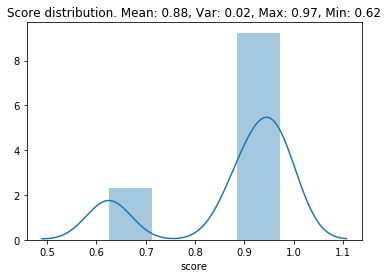

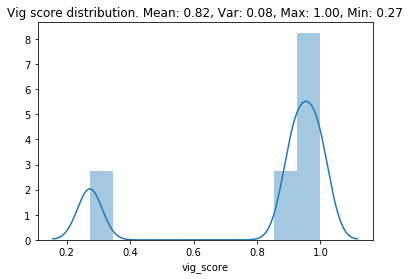

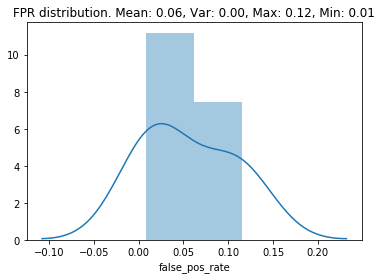

In [46]:
## Distributions

# Score distribution
show_distribution(df_nona_levels['score'], title='Score distribution')

# Vigilance score distribution
show_distribution(df_nona_levels['vig_score'], title='Vig score distribution')

# FPR distribution
show_distribution(df_nona_levels['false_pos_rate'], title='FPR distribution')


301
301


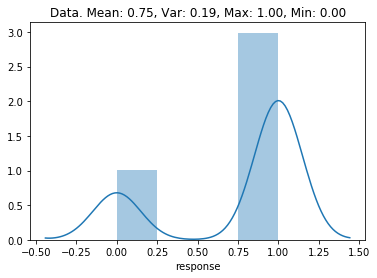

In [76]:
## Memorability
df_mem = df_videos

print(len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)]))
print(len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)]['id_video'].unique()))

df_mean = df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)].groupby('id_video').mean()
# display(df_mean)
# print(len(df_mean))
# print(len(df_mean.dropna()))
df_mem['mem_score']=df_mean['response']
# display(df_mem)
show_distribution(df_mean['response'])

In [72]:
print(df_mean['response'].values)

[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [62]:
len(df_nona_presentations)

1445